# Exercise2_Solution
> 2022/01/28 GONG ZERUI U2123891A

### Essential Libraries
> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization 

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

-----
### Problem 1: Data representation
##### a) Import the “train.csv” data you downloaded (either from NTU Learn or Kaggle) in Jupyter Notebook.

In [3]:
trainData = pd.read_csv('train.csv')
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### b) What are the data types (“dtypes”) – int64/float64/object – of the variables (columns) in the dataset?

In [4]:
trainData.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

##### c) Create a new Pandas DataFrame consisting of only the variables (columns) of type Integer (int64).
##### d) Open the “data_description.txt” file you downloaded (either from NTU Learn or Kaggle) in Wordpad.Read the description for each variable carefully and try to identify the “actual” Numeric variables.Categorical variables are often “encoded” as Numeric variables for easy representation. Spot them.
##### e) Drop non-Numeric variables from the DataFrame to have a clean DataFrame with Numeric variables.


In [5]:
df = trainData.select_dtypes(include='int64')
df = df.drop(columns = ['MSSubClass', 'OverallQual','OverallCond','YearBuilt','YearRemodAdd','YrSold','MoSold'])
df.head()

,Id,LotArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,1,8450,706,0,150,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,2,9600,978,0,284,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,3,11250,486,0,434,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,4,9550,216,0,540,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,5,14260,655,0,490,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


### Problem 2
##### a) Find the Summary Statistics (Mean, Median, Quartiles etc.) of SalePrice from the Numeric DataFrame.


In [6]:
SalePrice = pd.DataFrame(df['SalePrice'])
print("Mean:", SalePrice.mean())
print("Median:", SalePrice.median())
print("Quantile:", SalePrice.quantile([0.25,0.50,0.75]))
SalePrice.describe()


Mean: SalePrice    180921.19589
dtype: float64
Median: SalePrice    163000.0
dtype: float64
Quantile:       SalePrice
0.25   129975.0
0.50   163000.0
0.75   214000.0


,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


##### b) Visualize the summary statistics and distribution of SalePrice using standard Box-Plot, Histogram, KDE.


<AxesSubplot:ylabel='Count'>

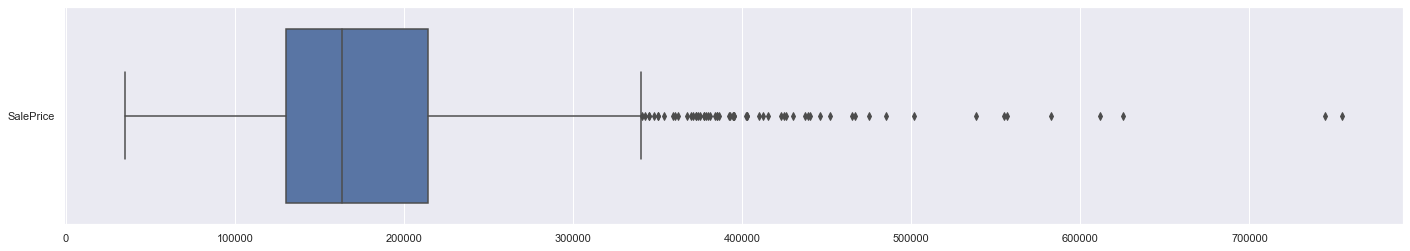

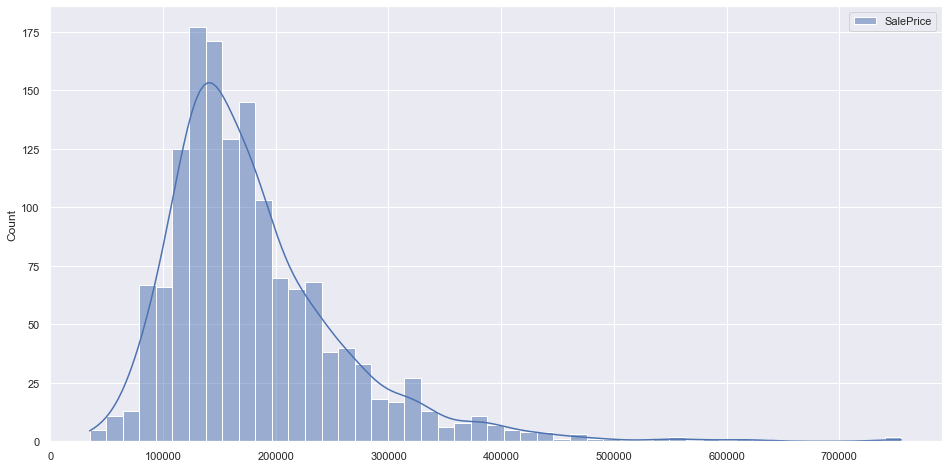

In [7]:
f = plt.figure(figsize = (24,4))
sb.boxplot(data = SalePrice, orient = "h")
f = plt.figure(figsize = (16,8))
sb.histplot(data = SalePrice, kde = True)

##### c) Find the Summary Statistics (Mean, Median, Quartiles etc) of LotArea from the Numeric DataFrame.


In [14]:
LotArea = pd.DataFrame(df['LotArea'])
LotArea.describe()

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


##### d) Visualize the summary statistics and distribution of LotArea using standard Box-Plot, Histogram, KDE.


<AxesSubplot:ylabel='Count'>

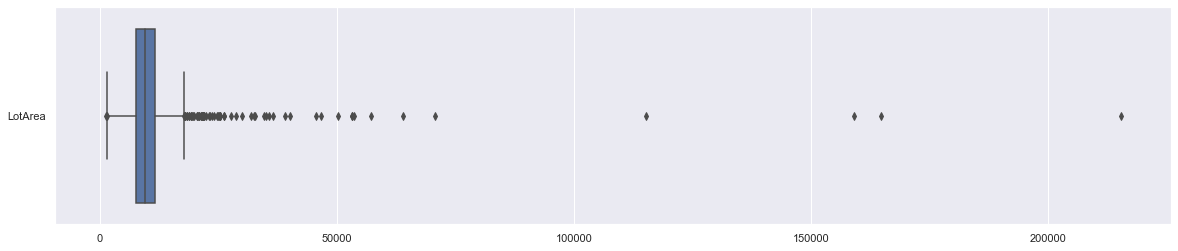

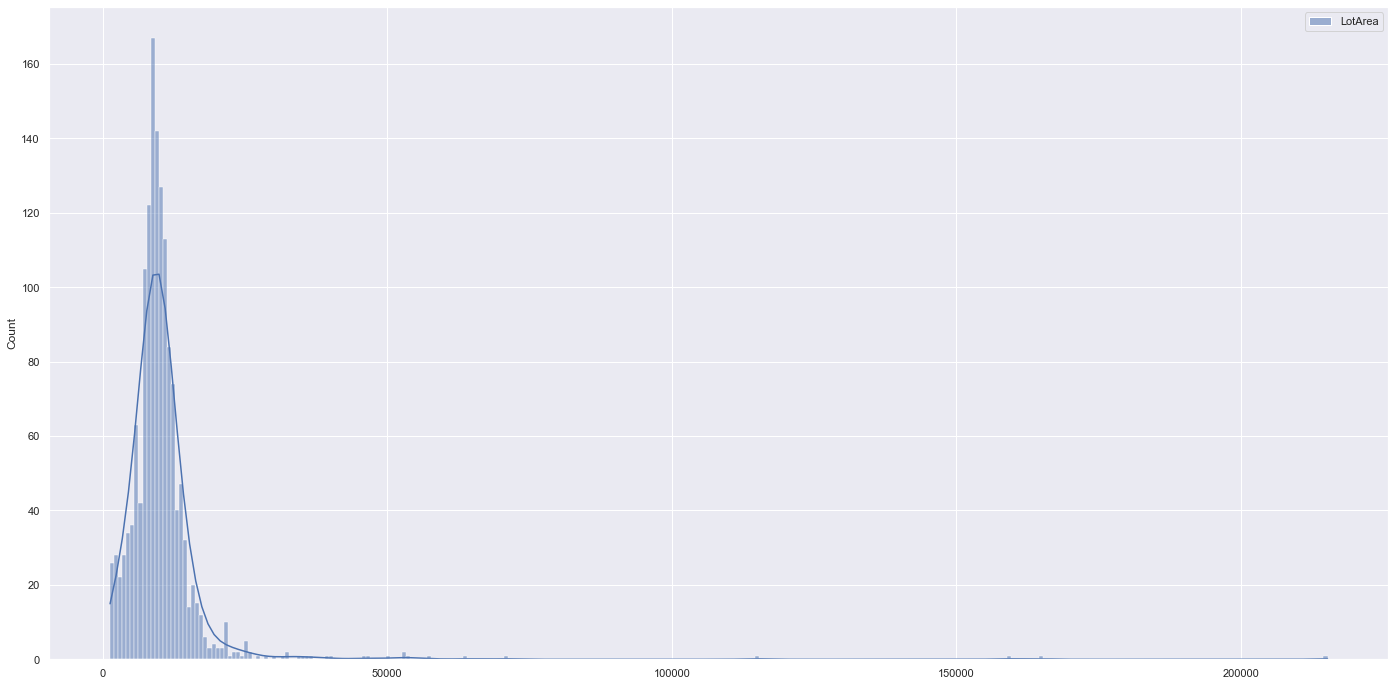

In [9]:
f= plt.figure(figsize = (20,4))
sb.boxplot(data = LotArea, orient = 'h')
f= plt.figure(figsize = (24, 12))
sb.histplot(data = LotArea, kde ='True')

##### e) Plot SalePrice (y-axis) vs LotArea (x-axis) using jointplot and find the Correlation between the two.

,SalePrice,LotArea
SalePrice,1.000000,0.263843
LotArea,0.263843,1.000000


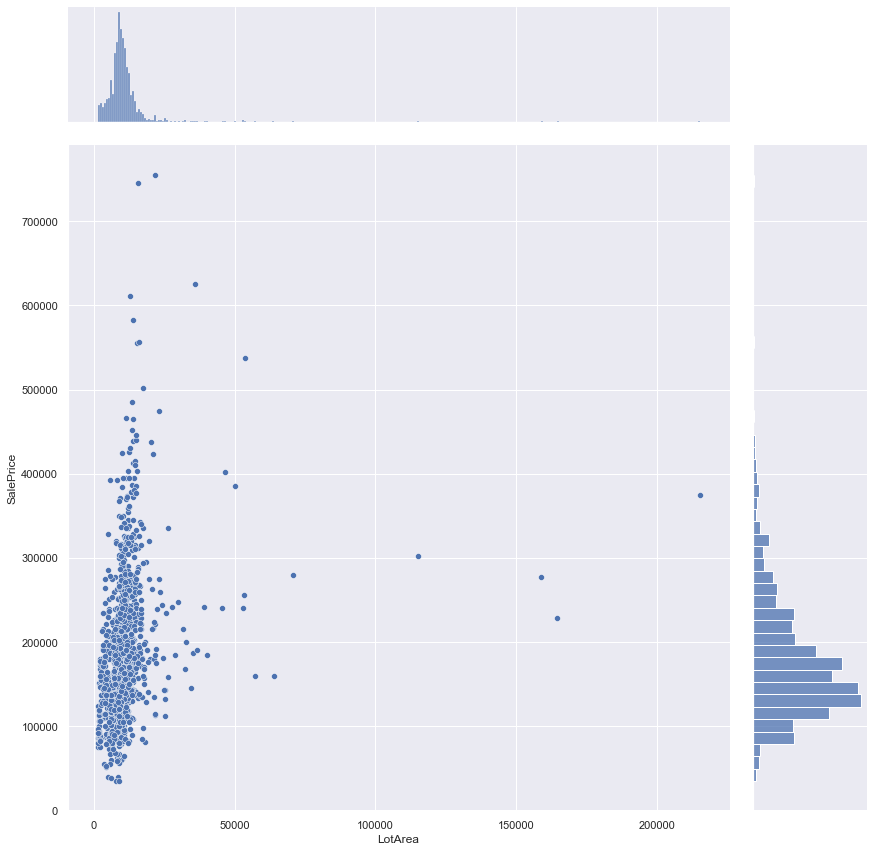

In [10]:
jointDF = pd.concat([SalePrice, LotArea],axis = 1)
sb.jointplot(data = jointDF, x = 'LotArea', y = "SalePrice", height = 12)
# Calculate the correlation between the two columns/variables
jointDF.corr()